In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_test = [0]*22
for i in range(1,22):
    if i < 10:
        data_test[i] = pd.read_csv('DT_csv/0{id}_test.csv'.format(id=i))
    else:
        data_test[i] = pd.read_csv('DT_csv/{id}_test.csv'.format(id=i))

In [3]:
data_train = [0]*22
for i in range(1,22):
    if i < 10:
        data_train[i] = pd.read_csv('DT_csv/0{id}_train.csv'.format(id=i))
    else:
        data_train[i] = pd.read_csv('DT_csv/{id}_train.csv'.format(id=i))

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [5]:
for i in range(1, 22):
    print(i, 'классы train:', data_train[i]['y'].unique(), 'классы test:', data_test[i]['y'].unique())

1 классы train: [ 3 10 12  1 11 16 17 19 20  9 18  8  7 13  4  5  2 14 15  6] классы test: [11 12  1 10 17 16]
2 классы train: [ 9  5  4 10  2 13  1 12  6 11  7  3  8] классы test: [ 1  5  3  6 10 12  2  4  9  7 11 13  8]
3 классы train: [15 11  7  4  8 13  6 10 14  3  5 16  1  2 12  9] классы test: [11 15]
4 классы train: [ 7  8 11  6  1 10  5  2  3  9  4] классы test: [ 7  6 10  3 11  8]
5 классы train: [1 4 2 3] классы test: [4 2]
6 классы train: [3 1 2] классы test: [1 3 2]
7 классы train: [ 6  5  4  2 11  8  9  7  3 10  1] классы test: [ 4 11  6  2  8  5]
8 классы train: [1 2] классы test: [1 2]
9 классы train: [1 8 6 3 2 7 5 4 9] классы test: [1 7 2 6 8 5 3 9 4]
10 классы train: [ 2 12  8  1  5 14 11  4  7 13  9 10  6  3 15] классы test: [ 2  8 12 14  5  1  7 11]
11 классы train: [ 2  3  4  8  1  5 10  6  9  7] классы test: [2 3]
12 классы train: [4 1 5 3 2] классы test: [4 1 2 3 5]
13 классы train: [6 1 3 4 5 7 2 8] классы test: [6 3 2 1 5 8 7 4]
14 классы train: [ 6 10 12  4  9

In [6]:
data_test[3]['y'].value_counts()

15    1796
11     278
Name: y, dtype: int64

In [7]:
data_test[15]['y'].value_counts()

16    1582
5       83
Name: y, dtype: int64

In [8]:
data_test[16]['y'].value_counts()

7     1626
15    1584
Name: y, dtype: int64

In [9]:
X_train = [0]*22
y_train = [0]*22
X_test = [0]*22
y_test = [0]*22
for i in range(1, len(data_test)):
    X_test[i] = data_test[i].iloc[:,:-1].values
    X_train[i] = data_train[i].iloc[:,:-1].values
    y_train[i] = data_train[i].iloc[:,-1:].values
    y_test[i] = data_test[i].iloc[:,-1:].values

In [10]:
best_deph = [0]
for j in range(1, len(data_test)):
    score_test = [0]
    score_train = [0]
    for i in range (1, 11):
        tree_model = DecisionTreeClassifier(criterion='entropy', max_depth=i, random_state=1)
        tree_model.fit(X_train[j], y_train[j])
        y_pred_test = tree_model.predict(X_test[j])
        score_test.append(accuracy_score(y_test[j], y_pred_test))
    best_deph.append(score_test.index(max(score_test)))

In [11]:
best_deph[1:]

[3, 9, 1, 5, 1, 3, 3, 2, 5, 4, 1, 9, 7, 5, 1, 1, 7, 5, 7, 7, 9]

In [13]:
%%time
#import warnings
#warnings.filterwarnings("ignore")
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
best_param = [0]
for j in range(1, len(data_test)):
    param_grid = {'criterion':['gini','entropy'],'max_depth': np.arange(1, 11), 'splitter':['best', 'random']}
    dtree_model=DecisionTreeClassifier(random_state=1)
    dtree_gscv = GridSearchCV(dtree_model, param_grid, n_jobs=-1)
    dtree_gscv.fit(X_train[j], y_train[j])
    best_param.append(dtree_gscv.best_params_)

Wall time: 41 s


In [15]:
print(*best_param[1:], sep='\n')

{'criterion': 'entropy', 'max_depth': 3, 'splitter': 'best'}
{'criterion': 'entropy', 'max_depth': 9, 'splitter': 'best'}
{'criterion': 'gini', 'max_depth': 1, 'splitter': 'best'}
{'criterion': 'entropy', 'max_depth': 5, 'splitter': 'best'}
{'criterion': 'gini', 'max_depth': 1, 'splitter': 'best'}
{'criterion': 'entropy', 'max_depth': 3, 'splitter': 'best'}
{'criterion': 'gini', 'max_depth': 3, 'splitter': 'best'}
{'criterion': 'entropy', 'max_depth': 2, 'splitter': 'best'}
{'criterion': 'gini', 'max_depth': 4, 'splitter': 'best'}
{'criterion': 'entropy', 'max_depth': 4, 'splitter': 'best'}
{'criterion': 'gini', 'max_depth': 1, 'splitter': 'best'}
{'criterion': 'entropy', 'max_depth': 8, 'splitter': 'best'}
{'criterion': 'entropy', 'max_depth': 6, 'splitter': 'best'}
{'criterion': 'entropy', 'max_depth': 5, 'splitter': 'best'}
{'criterion': 'gini', 'max_depth': 1, 'splitter': 'best'}
{'criterion': 'gini', 'max_depth': 1, 'splitter': 'best'}
{'criterion': 'entropy', 'max_depth': 7, 'spl

In [16]:
for i in range(1, len(best_param)):
    print(best_param[i]['max_depth'], best_deph[i])

3 3
9 9
1 1
5 5
1 1
3 3
3 3
2 2
4 5
4 4
1 1
8 9
6 7
5 5
1 1
1 1
7 7
4 5
7 7
6 7
8 9


In [17]:
import copy
params = copy.deepcopy(best_param)
for i in range(1, len(params)):
    del params[i]['max_depth']
    del params[i]['splitter']

In [18]:
score_test = [0]
score_train = [0]
for i in range (1, 11):
    tree_model = DecisionTreeClassifier(criterion='gini', splitter ='best', max_depth=i, random_state=1)
    tree_model.fit(X_train[3], y_train[3])
    y_pred_test = tree_model.predict(X_test[3])
    score_test.append(accuracy_score(y_test[3], y_pred_test))
    y_pred_train = tree_model.predict(X_train[3])
    score_train.append(accuracy_score(y_train[3], y_pred_train))
#for i in range(1, len(score_test)):
#    print(i, score_train[i], score_test[i])

1 0.9532304725168756 1.0
2 0.9537126325940212 1.0
3 0.9551591128254581 0.996142719382835
4 0.9566055930568949 0.9922854387656702
5 0.9575699132111861 0.991321118611379
6 0.9585342333654774 0.9908389585342333
7 0.9594985535197685 0.9903567984570878
8 0.9604628736740598 0.9893924783027965
9 0.9614271938283511 0.9884281581485053
10 0.9619093539054966 0.9889103182256509


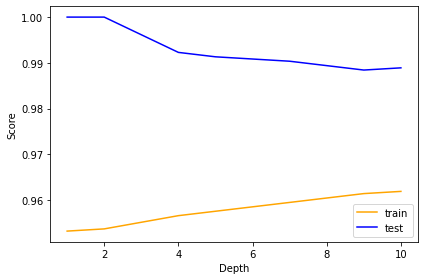

<Figure size 7200x4800 with 0 Axes>

In [19]:
score_test = [0]
score_train = [0]
for i in range (1, 11):
    tree_model = DecisionTreeClassifier(criterion='gini', splitter ='best', max_depth=i, random_state=1)
    tree_model.fit(X_train[3], y_train[3])
    y_pred_test = tree_model.predict(X_test[3])
    score_test.append(accuracy_score(y_test[3], y_pred_test))
    y_pred_train = tree_model.predict(X_train[3])
    score_train.append(accuracy_score(y_train[3], y_pred_train))
for i in range(1, len(score_test)):
    print(i, score_train[i], score_test[i])
plt.plot(range(1, len(score_test)), score_train[1:], label = 'train', c = 'orange')
plt.plot(range(1, len(score_test)), score_test[1:], label = 'test', c = 'b')
plt.ylabel('Score')
plt.xlabel("Depth")
plt.legend(loc='lower right')
plt.tight_layout()
plt.figure(dpi=1200)
plt.show()

1 0.5993317913132871 0.638396299151889
2 0.808532510922642 0.8650732459521974
3 0.9465433050629658 0.9997429966589566
4 0.9468003084040093 0.9989719866358263
5 0.9473143150860961 0.9979439732716525
6 0.949627345155487 0.9933179131328708
7 0.9568234387047032 0.9830377794911334
8 0.9676175790285274 0.9758416859419172
9 0.9794397327165253 0.9617065021845284
10 0.9874068362888717 0.9521973785659213


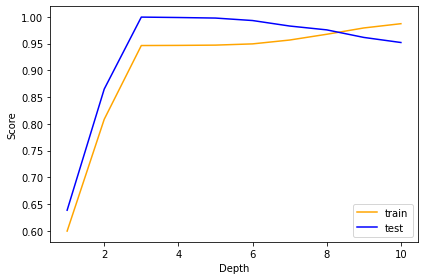

<Figure size 7200x4800 with 0 Axes>

In [20]:
score_test = [0]
score_train = [0]
for i in range (1, 11):
    tree_model = DecisionTreeClassifier(criterion='entropy', splitter ='best', max_depth=i, random_state=1)
    tree_model.fit(X_train[1], y_train[1])
    y_pred_test = tree_model.predict(X_test[1])
    score_test.append(accuracy_score(y_test[1], y_pred_test))
    y_pred_train = tree_model.predict(X_train[1])
    score_train.append(accuracy_score(y_train[1], y_pred_train))
for i in range(1, len(score_test)):
    print(i, score_train[i], score_test[i])
plt.plot(range(1, len(score_test)), score_train[1:], label = 'train', c = 'orange')
plt.plot(range(1, len(score_test)), score_test[1:], label = 'test', c = 'b')
plt.ylabel('Score')
plt.xlabel("Depth")
plt.legend(loc='lower right')
plt.tight_layout()
plt.figure(dpi=1200)
plt.show()

In [18]:
print(score_train[1:], score_test[1:], sep='\n')

[0.5993317913132871, 0.808532510922642, 0.9465433050629658, 0.9468003084040093, 0.9473143150860961, 0.949627345155487, 0.9568234387047032, 0.9676175790285274, 0.9794397327165253, 0.9874068362888717]
[0.638396299151889, 0.8650732459521974, 0.9997429966589566, 0.9989719866358263, 0.9979439732716525, 0.9933179131328708, 0.9830377794911334, 0.9758416859419172, 0.9617065021845284, 0.9521973785659213]


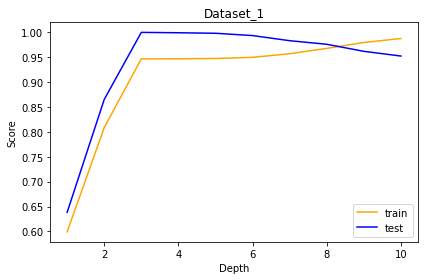

<Figure size 7200x4800 with 0 Axes>

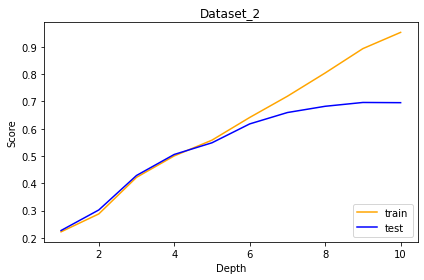

<Figure size 7200x4800 with 0 Axes>

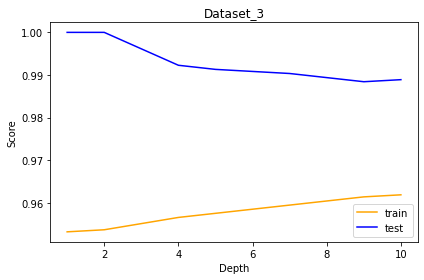

<Figure size 7200x4800 with 0 Axes>

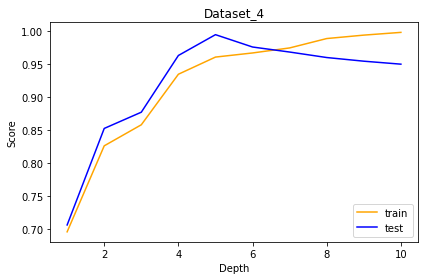

<Figure size 7200x4800 with 0 Axes>

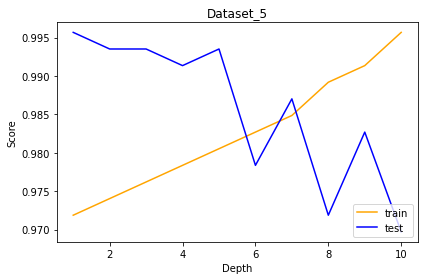

<Figure size 7200x4800 with 0 Axes>

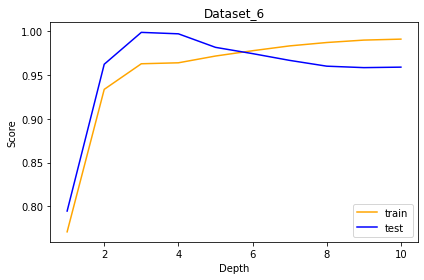

<Figure size 7200x4800 with 0 Axes>

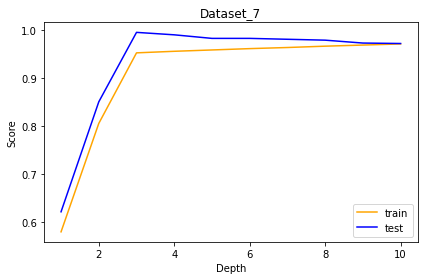

<Figure size 7200x4800 with 0 Axes>

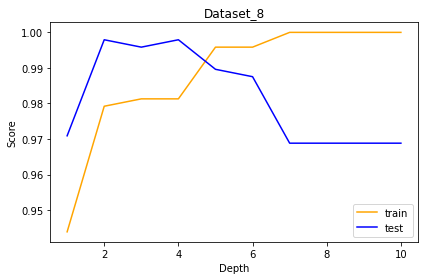

<Figure size 7200x4800 with 0 Axes>

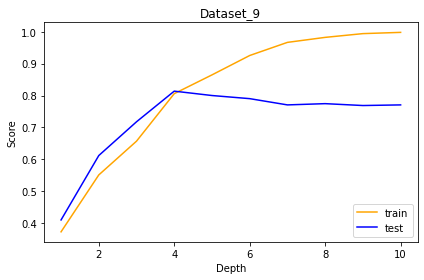

<Figure size 7200x4800 with 0 Axes>

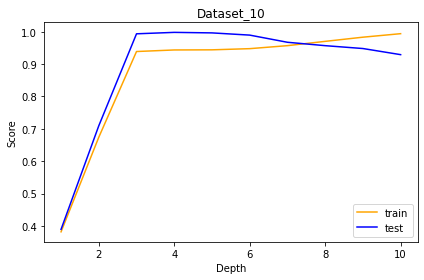

<Figure size 7200x4800 with 0 Axes>

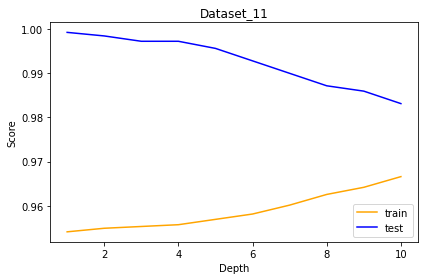

<Figure size 7200x4800 with 0 Axes>

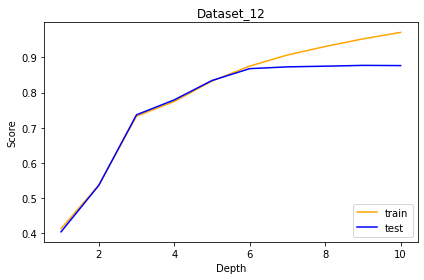

<Figure size 7200x4800 with 0 Axes>

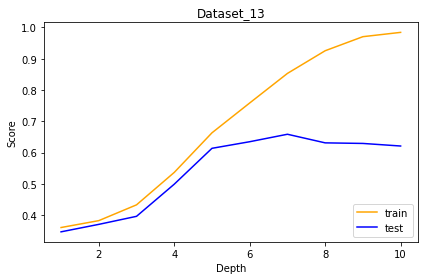

<Figure size 7200x4800 with 0 Axes>

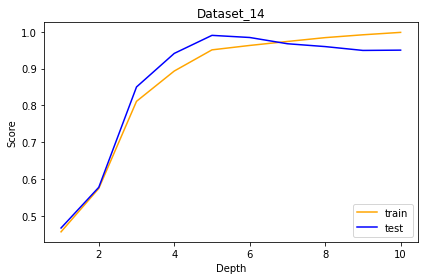

<Figure size 7200x4800 with 0 Axes>

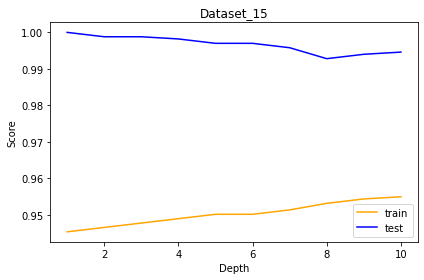

<Figure size 7200x4800 with 0 Axes>

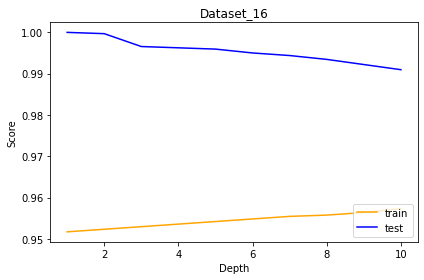

<Figure size 7200x4800 with 0 Axes>

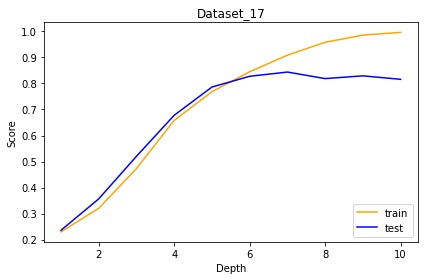

<Figure size 7200x4800 with 0 Axes>

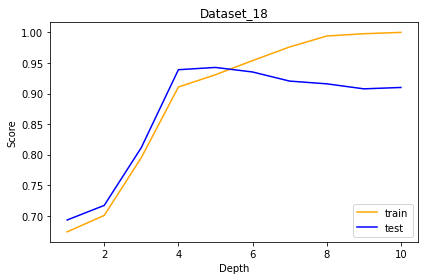

<Figure size 7200x4800 with 0 Axes>

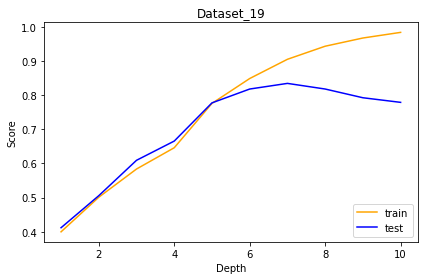

<Figure size 7200x4800 with 0 Axes>

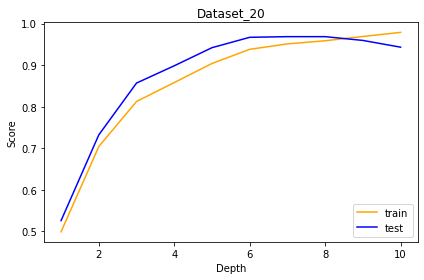

<Figure size 7200x4800 with 0 Axes>

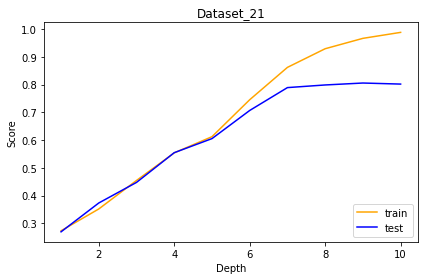

<Figure size 7200x4800 with 0 Axes>

In [18]:
for j in (range(1, len(data_test))):    
    score_test = [0]
    score_train = [0]
    for i in range (1, 11):
        tree_model = DecisionTreeClassifier(**params[j], splitter ='best', max_depth=i, random_state=1)
        tree_model.fit(X_train[j], y_train[j])
        y_pred_test = tree_model.predict(X_test[j])
        score_test.append(accuracy_score(y_test[j], y_pred_test))
        y_pred_train = tree_model.predict(X_train[j])
        score_train.append(accuracy_score(y_train[j], y_pred_train))
    plt.title("Dataset_{id}".format(id=j))
    plt.plot(range(1, len(score_test)), score_train[1:], label = 'train', c = 'orange')
    plt.plot(range(1, len(score_test)), score_test[1:], label = 'test', c = 'b')
    plt.ylabel('Score')
    plt.xlabel("Depth")
    plt.legend(loc='lower right')
    plt.tight_layout()
    plt.figure(dpi=1200)
    plt.show()

In [15]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
%%time
forest_test_score = [0]
forest_train_score = [0]
for i in range(1, len((data_test))):
    clf = RandomForestClassifier(**params[j], n_jobs=-1, n_estimators=100, random_state=1)
    clf.fit(X_train[i], np.ravel(y_train[i]))
    y_pred_test = clf.predict(X_test[i])
    score_test = (accuracy_score(y_test[i], y_pred_test))
    y_pred_train = clf.predict(X_train[i])
    score_train = (accuracy_score(y_train[i], y_pred_train))
    forest_test_score.append(score_test)
    forest_train_score.append(score_train)

Wall time: 10.6 s


In [23]:
tree_test_score = [0]
tree_train_score = [0] 
for i in range(1, len((data_test))):
    tree_model = DecisionTreeClassifier(**best_param[i], random_state=1)
    tree_model.fit(X_train[i], y_train[i])
    y_pred_test = tree_model.predict(X_test[i])
    score_test = (accuracy_score(y_test[i], y_pred_test))
    y_pred_train = tree_model.predict(X_train[i])
    score_train = (accuracy_score(y_train[i], y_pred_train))
    tree_test_score.append(score_test)
    tree_train_score.append(score_train)

In [25]:
df = pd.DataFrame(np.column_stack((tree_train_score, tree_test_score, forest_train_score, forest_test_score)),
columns=['best_tree_train_score', 'best_tree_test_score', 'forest_train_score', 'forest_test_score'])

In [26]:
df.iloc[1:]

,best_tree_train_score,best_tree_test_score,forest_train_score,forest_test_score
1,0.946543,0.999743,0.999743,0.998972
2,0.893893,0.696438,1.000000,0.511959
3,0.953230,1.000000,1.000000,0.999036
4,0.961043,0.995130,1.000000,0.876522
5,0.971861,0.995671,1.000000,0.995671
6,0.963024,0.998896,1.000000,0.993929
7,0.953023,0.995814,1.000000,0.935814
8,0.979210,0.997921,1.000000,0.970894
9,0.805882,0.813725,1.000000,0.780392
10,0.943662,0.997988,1.000000,0.997183


In [14]:
%%time
param_grid = {'criterion':['gini','entropy'],'min_samples_split' : range(2, 5), 'min_samples_leaf' : range(1, 6), 'class_weight' : ['balanced', 'balanced_subsample']}
forest = RandomForestClassifier(n_jobs=-1, random_state=1, n_estimators= 100, max_features = None)
forest_gscv = GridSearchCV(forest, param_grid, n_jobs=-1)
forest_gscv.fit(X_train[13], y_train[13])
print(forest_gscv.best_params_)

NameError: name 'RandomForestClassifier' is not defined

In [27]:
%%time
clf = RandomForestClassifier(class_weight = 'balanced', criterion = 'entropy', min_samples_leaf = 1, min_samples_split = 4, n_jobs=-1, random_state=1, n_estimators= 1000, max_features = None)
clf.fit(X_train[13], np.ravel(y_train[13]))
y_pred_test = clf.predict(X_test[13])
score_test = (accuracy_score(y_test[13], y_pred_test))
y_pred_train = clf.predict(X_train[13])
score_train = (accuracy_score(y_train[13], y_pred_train))
print(score_test)
print(score_train)


0.8752293577981651
1.0
Wall time: 19.9 s


In [29]:
forest_test_score[13] = score_test

In [16]:
%%time
param_grid = {'criterion':['gini','entropy'],'min_samples_split' : range(2, 5), 'min_samples_leaf' : range(1, 6), 'class_weight' : ['balanced', 'balanced_subsample']}
forest = RandomForestClassifier(n_jobs=-1, random_state=1, n_estimators= 100, max_features = None)
forest_gscv = GridSearchCV(forest, param_grid, n_jobs=-1)
forest_gscv.fit(X_train[2], y_train[2])
print(forest_gscv.best_params_)

KeyboardInterrupt: 

In [31]:
%%time
clf = RandomForestClassifier(class_weight = 'balanced', criterion = 'entropy', min_samples_leaf = 1, min_samples_split = 2, n_jobs=-1, random_state=1, n_estimators= 100, max_features = None)
clf.fit(X_train[2], np.ravel(y_train[2]))
y_pred_test = clf.predict(X_test[2])
score_test = (accuracy_score(y_test[2], y_pred_test))
y_pred_train = clf.predict(X_train[2])
score_train = (accuracy_score(y_train[2], y_pred_train))
print(score_test)
print(score_train)

0.7699745547073792
1.0
Wall time: 14.6 s


In [32]:
forest_test_score[2] = score_test

In [40]:
%%time
param_grid = {'criterion':['gini','entropy'],'min_samples_split' : range(2, 5), 'min_samples_leaf' : range(1, 6), 'class_weight' : ['balanced', 'balanced_subsample']}
forest = RandomForestClassifier(n_jobs=-1, random_state=1, n_estimators= 100, max_features = None)
forest_gscv = GridSearchCV(forest, param_grid, n_jobs=-1)
forest_gscv.fit(X_train[17], y_train[17])
print(forest_gscv.best_params_)

C:\Users\Артем\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'class_weight': 'balanced', 'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 2}
Wall time: 7min 45s


In [33]:
%%time
clf = RandomForestClassifier(class_weight = 'balanced', criterion = 'entropy', min_samples_leaf = 1, min_samples_split = 2, n_jobs=-1, random_state=1, n_estimators= 1000, max_features = None)
clf.fit(X_train[17], np.ravel(y_train[17]))
y_pred_test = clf.predict(X_test[17])
score_test = (accuracy_score(y_test[17], y_pred_test))
y_pred_train = clf.predict(X_train[17])
score_train = (accuracy_score(y_train[17], y_pred_train))
print(score_test)
print(score_train)

0.8531546621998883
1.0
Wall time: 32.4 s


In [34]:
forest_test_score[17] = score_test

In [35]:
forest_train_score = np.array(forest_train_score)
forest_test_score = np.array(forest_test_score)
df = pd.DataFrame(np.column_stack((tree_train_score, tree_test_score, forest_train_score, forest_test_score)),
columns=['best_tree_train_score', 'best_tree_test_score', 'forest_train_score', 'forest_test_score'])
df.iloc[1:]

,best_tree_train_score,best_tree_test_score,forest_train_score,forest_test_score
1,0.946543,0.999743,0.999743,0.998972
2,0.893893,0.696438,1.000000,0.769975
3,0.953230,1.000000,1.000000,0.999036
4,0.961043,0.995130,1.000000,0.876522
5,0.971861,0.995671,1.000000,0.995671
6,0.963024,0.998896,1.000000,0.993929
7,0.953023,0.995814,1.000000,0.935814
8,0.979210,0.997921,1.000000,0.970894
9,0.805882,0.813725,1.000000,0.780392
10,0.943662,0.997988,1.000000,0.997183
